Everything else being equal (ceteris-paribus) how much more should people expect to pay when the weather is bad?

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("taxi_weather.csv")
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,distance_traveled_km,week_day
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,3.13,0.50,0.0,0,72,57,17.231137,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,9.84,0.00,0.0,0,30,20,246.295936,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,4.92,0.07,0.0,0,83,67,55.251875,3
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,4.92,0.22,0.0,0,71,54,38.152003,5
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,4.47,0.00,0.0,0,61,44,74.122374,1


To try to figure out what constitutes bad weather, figure out the distributions of the PRCP, AWND, and SNOW features

According the NOAA, snowfall accumulating to 6" or more in depth in 24 hours or less is considered heavy snowfall, so I'll create a column called heavy_snow where any row where SNOW >= 6 will have 1 and 0 otherwise

According to NOAA, moderate rainfall measures 0.10 to 0.30 inches of rain per hour and heavy rainfall is more than 0.30 inches of rain per hour. Since this data is over a 24 hour period, I'll say that 0.15 * 24 inches of rain will qualify as heavy_rain.

In [19]:
heavy_rain = df[df['PRCP'] > 3.6]
len(heavy_rain)

1655

In [4]:
def heavy_snow(snow):
    if snow >= 6:
        return 1
    else:
        return 0

df['heavy_snow'] = df.apply(lambda x: heavy_snow(x['SNOW']), axis=1)

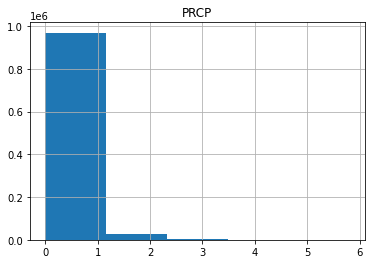

In [5]:
rain = df.hist(column='PRCP', bins=5)

In [6]:
rain_df = df[df['PRCP'] > 0]
len(rain_df)

335784

In [7]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,distance_traveled_km,week_day,heavy_snow
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,3.13,0.50,0.0,0,72,57,17.231137,0,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,9.84,0.00,0.0,0,30,20,246.295936,1,0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,4.92,0.07,0.0,0,83,67,55.251875,3,0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,4.92,0.22,0.0,0,71,54,38.152003,5,0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,4.47,0.00,0.0,0,61,44,74.122374,1,0


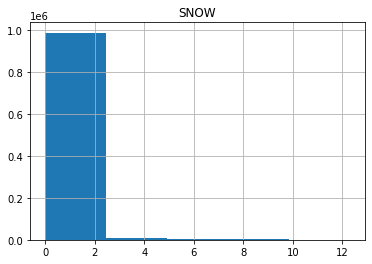

In [8]:
snow = df.hist(column='SNOW', bins=5)

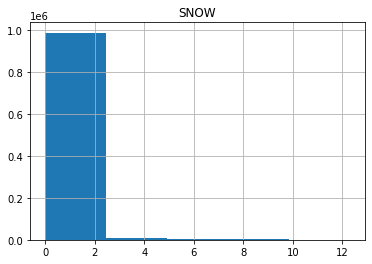

In [9]:
snow = df.hist(column='SNOW', bins=5)

In [10]:
heavy_snow = df[df['SNOW'] > 6]
len(heavy_snow)

4555

In [11]:
heavy_snow.iloc[1]

fare_amount                                  17
pickup_datetime         2013-02-08 09:50:04 UTC
pickup_longitude                       -73.9625
pickup_latitude                          40.759
dropoff_longitude                      -73.9862
dropoff_latitude                        40.7534
passenger_count                               1
DATE                                 2013-02-08
AWND                                      13.65
PRCP                                       1.15
SNOW                                        6.3
SNWD                                          0
TMAX                                         34
TMIN                                         27
distance_traveled_km                    151.344
week_day                                      4
heavy_snow                                    1
Name: 145, dtype: object

In [12]:
df['week_day'].value_counts()

4    154245
5    151279
3    149670
2    144838
1    139989
6    131301
0    128678
Name: week_day, dtype: int64

In [13]:
weekend = df[(df['week_day'] == 5) | (df['week_day'] == 5)]

In [14]:
weekend.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,DATE,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,distance_traveled_km,week_day,heavy_snow
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,4.92,0.22,0.0,0,71,54,38.152003,5,0
15,5.0,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1,2013-11-23,9.62,0.00,0.0,0,54,31,0.000000,5,0
19,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06,4.03,1.22,0.0,0,50,39,4.180717,5,0
41,10.9,2011-10-15 10:55:24 UTC,-74.003899,40.725514,-73.976484,40.765537,2,2011-10-15,7.61,0.00,0.0,0,65,54,179.447883,5,0
51,5.5,2012-10-06 20:31:36 UTC,-73.952825,40.772048,-73.952194,40.781152,3,2012-10-06,5.59,0.00,0.0,0,77,54,8.277746,5,0


In [15]:
weekend['fare_amount'].mean()

11.026804182999623

In [16]:
df[df['week_day'] == 0]['fare_amount'].mean()

11.392021635399992

In [17]:
for n in range(7):
    print(df[df['week_day'] == n]['fare_amount'].mean())

11.392021635399992
11.223958025273415
11.286309462986232
11.510122202178128
11.391672987779181
11.026804182999623
11.639717214644214
